# Computer Vision
# Bag of Visual Words(BoVW)
### Flowers Dataset
#### Name: Muhammed Umer Nazir | CMS ID: 399874

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
import matplotlib.pyplot as plt
import os

### Creating Train and Test Datasets along with their Labels

In [2]:
train_data = []
train_labels = []

In [4]:
folder_path = "Downloads/Computer Vision/Assignment 1/flower_photos/daisy"

for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Images have been converted to grayscale to keep things simple and reduce complexity.
    train_data.append(gray)
    train_labels.append(1)

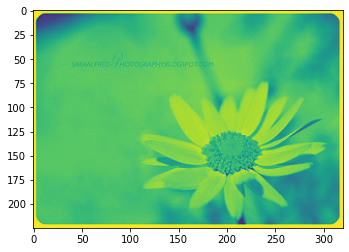

In [5]:
plt.imshow(train_data[23])

In [6]:
print(len(train_data))
print(len(train_labels))
type(train_data)

633
633


list

In this dataset, the images need to be divided into train and test set. The approch that I have used to split is that I first append all the images in the training set and then I move last n number of images into the test set and remove them from the training set. This way, the images will get divided into training and test set.

In [7]:
test_data = []
test_labels = []

In [8]:
test_data.extend(train_data[-33:])
del train_data[-33:]
test_labels.extend(train_labels[-33:])
del train_labels[-33:]

In [9]:
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

600
600
33
33


In [10]:
folder_path = "Downloads/Computer Vision/Assignment 1/flower_photos/dandelion"

for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Images have been converted to grayscale to keep things simple and reduce complexity.
    train_data.append(gray)
    train_labels.append(2)

In [11]:
print(len(train_data))
print(len(train_labels))

1498
1498


In [12]:
test_data.extend(train_data[-48:])
del train_data[-48:]
test_labels.extend(train_labels[-48:])
del train_labels[-48:]

In [13]:
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

1450
1450
81
81


In [14]:
folder_path = "Downloads/Computer Vision/Assignment 1/flower_photos/roses"

for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Images have been converted to grayscale to keep things simple and reduce complexity.
    train_data.append(gray)
    train_labels.append(3)

In [15]:
print(len(train_data))
print(len(train_labels))

2091
2091


In [16]:
test_data.extend(train_data[-41:])
del train_data[-41:]
test_labels.extend(train_labels[-41:])
del train_labels[-41:]

In [17]:
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

2050
2050
122
122


In [18]:
folder_path = "Downloads/Computer Vision/Assignment 1/flower_photos/sunflowers"

for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Images have been converted to grayscale to keep things simple and reduce complexity.
    train_data.append(gray)
    train_labels.append(4)

In [19]:
print(len(train_data))
print(len(train_labels))

2749
2749


In [20]:
test_data.extend(train_data[-49:])
del train_data[-49:]
test_labels.extend(train_labels[-49:])
del train_labels[-49:]

In [21]:
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

2700
2700
171
171


In [22]:
folder_path = "Downloads/Computer Vision/Assignment 1/flower_photos/tulips"

for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Images have been converted to grayscale to keep things simple and reduce complexity.
    train_data.append(gray)
    train_labels.append(5)

In [23]:
print(len(train_data))
print(len(train_labels))

3499
3499


In [24]:
test_data.extend(train_data[-49:])
del train_data[-49:]
test_labels.extend(train_labels[-49:])
del train_labels[-49:]

In [25]:
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

3450
3450
220
220


### Extracting features from the training images using SIFT.

In [26]:
sift = cv2.SIFT_create()
descriptors = []

for img in train_data:
    kp, des = sift.detectAndCompute(img, None)
    descriptors.append(des)
descriptors = np.vstack(descriptors)

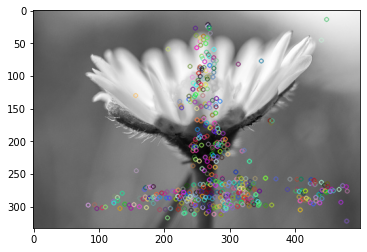

In [27]:
img_kp = cv2.drawKeypoints(train_data[45], kp, None)
plt.imshow(img_kp)
plt.show()

### Generating the Vocabulary, also known as Codewords

In [41]:
kmeans = KMeans(n_clusters=15, random_state=0).fit(descriptors)
histograms = []

for img in train_data:
    kp, des = sift.detectAndCompute(img, None)
    words = kmeans.predict(des)
    histogram, _ = np.histogram(words, bins=15)
    histograms.append(histogram)

/home/umer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
print(len(histograms))

3450


In [44]:
test_histograms = []

for img in test_data:
    kp, des = sift.detectAndCompute(img, None)
    words = kmeans.predict(des)
    histogram, _ = np.histogram(words, bins=15)
    test_histograms.append(histogram)


In [43]:
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(histograms, train_labels)

SVC(kernel='linear', random_state=0)

In [45]:
predictions = clf.predict(test_histograms)


accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using the SVM Classifier: {accuracy}")


Accuracy using the SVM Classifier: 0.45454545454545453


In [53]:
joblib.dump(clf, 'cv_flowers_svm_classifier.pkl')

['cv_flowers_svm_classifier.pkl']

In [54]:
clf = joblib.load('cv_flowers_svm_classifier.pkl')

In [46]:
report = classification_report(test_labels, predictions)
print('Classification report for SVM Classifier:\n', report)

Classification report for SVM Classifier:
               precision    recall  f1-score   support

           1       0.45      0.30      0.36        33
           2       0.39      0.77      0.52        48
           3       0.40      0.34      0.37        41
           4       0.72      0.53      0.61        49
           5       0.41      0.27      0.32        49

    accuracy                           0.45       220
   macro avg       0.47      0.44      0.44       220
weighted avg       0.48      0.45      0.44       220



In [79]:
X = np.array(histograms)
y = np.array(train_labels)
clf_Rand_Forest = RandomForestClassifier(n_estimators=250)
clf_Rand_Forest.fit(X, y)

RandomForestClassifier(n_estimators=250)

In [80]:
joblib.dump(clf_Rand_Forest, 'cv_flowers_Rand_Forest_classifier.pkl')

['cv_flowers_Rand_Forest_classifier.pkl']

In [81]:
clf_Rand_Forest = joblib.load('cv_flowers_Rand_Forest_classifier.pkl')

In [82]:
predictions_Rand_Forrest = clf_Rand_Forest.predict(test_histograms)

accuracy = accuracy_score(test_labels, predictions_Rand_Forrest)
print(f"Accuracy using the Random Forest Classifier: {accuracy}")

Accuracy using the Random Forest Classifier: 0.45


In [83]:
report_Rand_Forest = classification_report(test_labels, predictions_Rand_Forrest)
print('Classification report for Random Forest Classifier:\n', report_Rand_Forest)

Classification report for Random Forest Classifier:
               precision    recall  f1-score   support

           1       0.50      0.48      0.49        33
           2       0.42      0.56      0.48        48
           3       0.34      0.27      0.30        41
           4       0.62      0.63      0.63        49
           5       0.34      0.29      0.31        49

    accuracy                           0.45       220
   macro avg       0.44      0.45      0.44       220
weighted avg       0.44      0.45      0.44       220

